# Быстрая гистограмма
- Реализовать свою функцию построения дискретного распределения.
- С помощью результатов своего алгоритма и plt.bar построим гистограмму по массиву из 50+ случайных чисел.
- Сравним скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. Напишем decorator timer

In [1]:
def timer(number):
    def decorator(func):
        import time

        def wrapper(*args, **kwargs):
            result = 0
            for i in range(0, number):
                start = time.time()
                func(*args, **kwargs)
                end = time.time()
                result += end - start
            print("Method: ", func.__name__, ", Time:", result / number)
            return func(*args, **kwargs)

        return wrapper

    return decorator

In [2]:
from typing import List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np

@timer(100)
def fast_hist(arr: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param arr: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    min_val = min(arr)
    max_val = max(arr)
    step = (max_val - min_val) / bins
    bins_labels = [min_val + i * step for i in range(bins)]
    bins_labels.append(max_val)
    bins_values = [0] * bins
    for val in arr:
        for i in range(bins):
            if bins_labels[i] <= val < bins_labels[i + 1]:
                bins_values[i] += 1
            if i + 1 == len(bins_labels) - 1 and bins_labels[i + 1] == val:
                bins_values[i] += 1
    bins_labels = np.array(bins_labels).astype(float)
    bins_values = np.array(bins_values).astype(float)
    return bins_values, bins_labels

@timer(100)
def hist(arr, bins):
    return plt.hist(arr, bins=bins)

Method:  fast_hist , Time: 0.008931546211242676
Значения колонок: [3. 1. 1. 1. 1. 0. 1. 0. 0. 1. 3. 1. 3. 1. 5. 0. 2. 0. 1. 2. 2. 2. 0. 1.
 2. 1. 3. 3. 0. 1. 0. 2. 0. 1. 0. 1. 1. 2. 2. 2. 1. 3. 2. 1. 2. 0. 1. 0.
 1. 2. 3. 0. 3. 1. 5. 1. 3. 3. 1. 1. 1. 0. 4. 2. 3. 1. 2.]
Названия колонок: [ 0.          1.47761194  2.95522388  4.43283582  5.91044776  7.3880597
  8.86567164 10.34328358 11.82089552 13.29850746 14.7761194  16.25373134
 17.73134328 19.20895522 20.68656716 22.1641791  23.64179104 25.11940299
 26.59701493 28.07462687 29.55223881 31.02985075 32.50746269 33.98507463
 35.46268657 36.94029851 38.41791045 39.89552239 41.37313433 42.85074627
 44.32835821 45.80597015 47.28358209 48.76119403 50.23880597 51.71641791
 53.19402985 54.67164179 56.14925373 57.62686567 59.10447761 60.58208955
 62.05970149 63.53731343 65.01492537 66.49253731 67.97014925 69.44776119
 70.92537313 72.40298507 73.88059701 75.35820896 76.8358209  78.31343284
 79.79104478 81.26865672 82.74626866 84.2238806  85.701

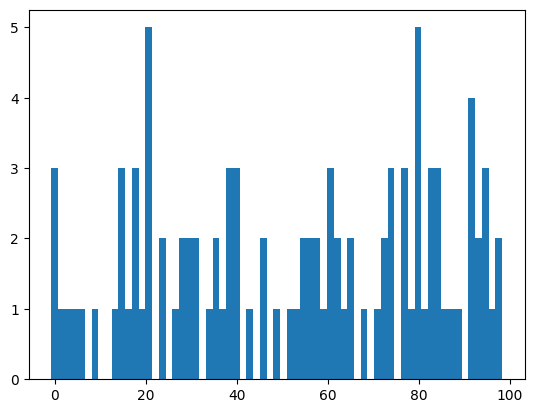

In [3]:
import numpy.random as rand

array = rand.randint(low=0, high=100, size=100)

value_counts, bins_names = fast_hist(array, bins=len(set(array)))

plt.bar(bins_names[:-1], value_counts, width=bins_names[1] - bins_names[0])

print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

Method:  hist , Time: 0.035251777172088626
Значения колонок: [3. 1. 1. 1. 1. 0. 1. 0. 0. 1. 3. 1. 3. 1. 5. 0. 2. 0. 1. 2. 2. 2. 0. 1.
 2. 1. 3. 3. 0. 1. 0. 2. 0. 1. 0. 1. 1. 2. 2. 2. 1. 3. 2. 1. 2. 0. 1. 0.
 1. 2. 3. 0. 3. 1. 5. 1. 3. 3. 1. 1. 1. 0. 4. 2. 3. 1. 2.]
Названия колонок: [ 0.          1.47761194  2.95522388  4.43283582  5.91044776  7.3880597
  8.86567164 10.34328358 11.82089552 13.29850746 14.7761194  16.25373134
 17.73134328 19.20895522 20.68656716 22.1641791  23.64179104 25.11940299
 26.59701493 28.07462687 29.55223881 31.02985075 32.50746269 33.98507463
 35.46268657 36.94029851 38.41791045 39.89552239 41.37313433 42.85074627
 44.32835821 45.80597015 47.28358209 48.76119403 50.23880597 51.71641791
 53.19402985 54.67164179 56.14925373 57.62686567 59.10447761 60.58208955
 62.05970149 63.53731343 65.01492537 66.49253731 67.97014925 69.44776119
 70.92537313 72.40298507 73.88059701 75.35820896 76.8358209  78.31343284
 79.79104478 81.26865672 82.74626866 84.2238806  85.70149254

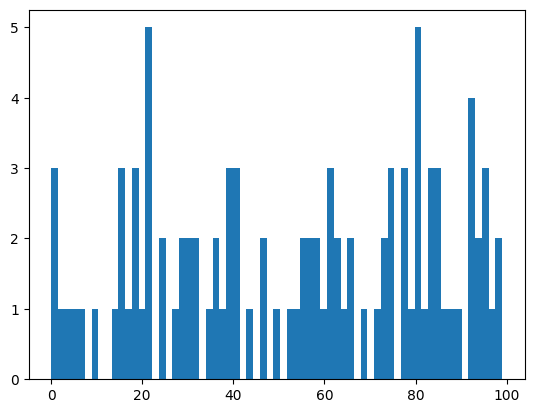

In [4]:
value_counts, bins_names, visual_figure = hist(array, bins=len(set(array)))
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)